# 이전 CNN MNIST


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

import time

In [2]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_x = train_x.reshape((60000, 28, 28, 1))
test_x = test_x.reshape((10000, 28, 28, 1))

train_y = raw_train_y
test_y = raw_test_y

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [4]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

# Functional API 타입 CNN MNIST
```
Functional API는 각 층을 일종의 함수(function)

장점
- 모형을 정의할 때 명확
- 시각화와 세부 내용을 확인할 수 있음
- serialized 또는 복제될 수 있음

단점
- 동적인 구조를 지원하지 않음
- 처음부터 직접 작성할 필요가 있음
```

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

import time

In [6]:
from tensorflow.keras import Model

input = Input((28,28,1))
x = Conv2D(32, (3, 3))(input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3))(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(10, activation='relu')(x)
x = Dense(10, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(input, output)

In [7]:
# model = keras.Sequential()
# model.add(Input((28,28,1)))
# model.add(Conv2D(32, (3, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(10, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(10, activation='softmax'))

from tensorflow.keras import Model

input = Input((28,28,1))
x = Conv2D(32, (3,3))(input)
x = MaxPooling2D((2,2))(x)
x = Conv2D(32, (3,3))(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(10, activation='relu')(x)
x = Dense(10, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(input, output)

In [8]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0   

# 다중 입력

copy from https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/

이미지로 집값 예측

## 데이터 준비

In [9]:
!git clone https://github.com/emanhamed/Houses-dataset

Cloning into 'Houses-dataset'...
remote: Enumerating objects: 2166, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2166 (delta 0), reused 0 (delta 0), pack-reused 2165
Receiving objects: 100% (2166/2166), 176.26 MiB | 36.12 MiB/s, done.
Resolving deltas: 100% (20/20), done.


```
Houses-dataset/
  Houses Dataset/
    100_bathroom.jpg
    100_bedroom.jpg
    ...
    HousesInfo.txt
```

In [10]:
!head 'Houses-dataset/Houses Dataset/HousesInfo.txt'

4 4 4053 85255 869500
4 3 3343 36372 865200
3 4 3923 85266 889000
5 5 4022 85262 910000
3 4 4116 85266 971226
4 5 4581 85266 1249000
3 4 2544 85262 799000
4 5 5524 85266 1698000
3 4 4229 85255 1749000
4 5 3550 85262 1500000


In [11]:
import matplotlib

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [12]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import cv2
import os

def load_house_attributes(inputPath):

	cols = ["bedrooms", "bathrooms", "area", "zipcode", "price"]
	df = pd.read_csv(inputPath, sep=" ", header=None, names=cols)
 
	# determine (1) the unique zip codes and (2) the number of data
	# points with each zip code
	zipcodes = df["zipcode"].value_counts().keys().tolist()
	counts = df["zipcode"].value_counts().tolist()
 
	# loop over each of the unique zip codes and their corresponding
	# count
	for (zipcode, count) in zip(zipcodes, counts):
		# the zip code counts for our housing dataset is *extremely*
		# unbalanced (some only having 1 or 2 houses per zip code)
		# so let's sanitize our data by removing any houses with less
		# than 25 houses per zip code
		if count < 25:
			idxs = df[df["zipcode"] == zipcode].index
			df.drop(idxs, inplace=True)
   
	# return the data frame
	return df

def process_house_attributes(df, train, test):
	# initialize the column names of the continuous data
	continuous = ["bedrooms", "bathrooms", "area"]

	# performin min-max scaling each continuous feature column to
	# the range [0, 1]
	cs = MinMaxScaler()
	trainContinuous = cs.fit_transform(train[continuous])
	testContinuous = cs.transform(test[continuous])
 
	# one-hot encode the zip code categorical data (by definition of
	# one-hot encoding, all output features are now in the range [0, 1])
	zipBinarizer = LabelBinarizer().fit(df["zipcode"])
	trainCategorical = zipBinarizer.transform(train["zipcode"])
	testCategorical = zipBinarizer.transform(test["zipcode"])
 
	# construct our training and testing data points by concatenating
	# the categorical features with the continuous features
	trainX = np.hstack([trainCategorical, trainContinuous])
	testX = np.hstack([testCategorical, testContinuous])
 
	# return the concatenated training and testing data
	return (trainX, testX)  

In [13]:
def load_house_images(df, inputPath):

	# initialize our images array (i.e., the house images themselves)
	images = []

	# loop over the indexes of the houses
	for i in df.index.values:
		# find the four images for the house and sort the file paths,
		# ensuring the four are always in the *same order*
		basePath = os.path.sep.join([inputPath, "{}_*".format(i + 1)])
		housePaths = sorted(list(glob.glob(basePath)))
  
		# initialize our list of input images along with the output image
		# after *combining* the four input images
		inputImages = []
		outputImage = np.zeros((64, 64, 3), dtype="uint8")
  
		# loop over the input house paths
		for housePath in housePaths:
			# load the input image, resize it to be 32 32, and then
			# update the list of input images
			image = cv2.imread(housePath)
			image = cv2.resize(image, (32, 32))
			inputImages.append(image)
   
		# tile the four input images in the output image such the first
		# image goes in the top-right corner, the second image in the
		# top-left corner, the third image in the bottom-right corner,
		# and the final image in the bottom-left corner
		outputImage[0:32, 0:32] = inputImages[0]
		outputImage[0:32, 32:64] = inputImages[1]
		outputImage[32:64, 32:64] = inputImages[2]
		outputImage[32:64, 0:32] = inputImages[3]

		# add the tiled image to our set of images the network will be
		# trained on
		images.append(outputImage)
  
	# return our set of images
	return np.array(images)  

### 값 정보 읽기

In [14]:
df = load_house_attributes("Houses-dataset/Houses Dataset/HousesInfo.txt")

In [15]:
df.head()

,bedrooms,bathrooms,area,zipcode,price
30,5,3.0,2520,93446,789000
32,3,2.0,1802,93446,365000
39,3,3.0,2146,93446,455000
80,4,2.5,2464,91901,599000
81,2,2.0,1845,91901,529800


### 영상 데이터 읽기

In [16]:
images = load_house_images(df, "Houses-dataset/Houses Dataset/")
images = images/255.

In [17]:
print(images.shape)

(362, 64, 64, 3)


In [18]:
(trainAttrX, testAttrX, trainImagesX, testImagesX) = train_test_split(df, images, test_size=0.25, random_state=42)

maxPrice = trainAttrX["price"].max()
trainY = trainAttrX["price"] / maxPrice
testY = testAttrX["price"] / maxPrice
(trainAttrX, testAttrX) = process_house_attributes(df, trainAttrX, testAttrX)

In [19]:
print("tainAttrX.shape=", trainAttrX.shape)
print("trainImagesX.shape=", trainImagesX.shape)
print("trainY.shape=", trainY.shape)
print("testAttrX.shape=", testAttrX.shape)
print("testImageX.shape=", testImagesX.shape)
print("testY.shape=", testY.shape)

tainAttrX.shape= (271, 10)
trainImagesX.shape= (271, 64, 64, 3)
trainY.shape= (271,)
testAttrX.shape= (91, 10)
testImageX.shape= (91, 64, 64, 3)
testY.shape= (91,)


# 개별적 예측 - 속성 데이터

template_attribute_data_regression 참고

In [20]:
print(trainY[:10])

148    0.323489
337    0.023045
444    0.107545
269    0.083476
362    0.013144
281    0.090304
94     0.011096
289    0.006145
101    0.131273
338    0.023045
Name: price, dtype: float64


In [21]:
print(train_x.shape)

(60000, 28, 28, 1)


In [22]:
train_x = trainAttrX
test_x = testAttrX
train_y = trainY.to_numpy()
test_y = testY.to_numpy()

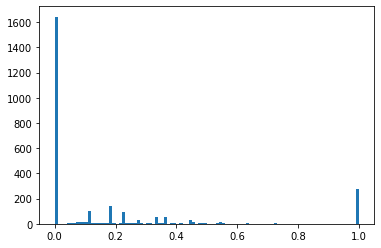

In [23]:
import matplotlib.pyplot as plt

plt.hist(train_x.flatten(), bins=100)
plt.show()

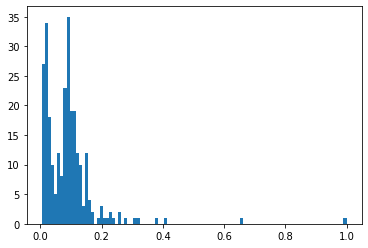

In [24]:
plt.hist(train_y.flatten(), bins=100)
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


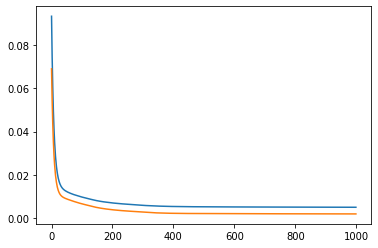

3/3 [==============================] - 0s 4ms/step - loss: 0.0012 - mape: 39.1224
loss= 0.001227398868650198
mape= 39.12236404418945


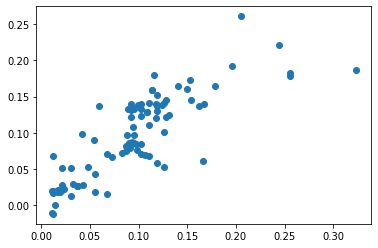

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(10,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

# 개별적 예측 - 영상 데이터

In [26]:
train_x = trainImagesX
test_x = testImagesX

train_y = trainY
test_y_ = testY

In [27]:
print(train_x.shape)

(271, 64, 64, 3)


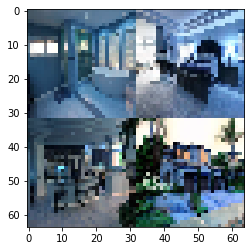

In [28]:
plt.imshow(train_x[0])
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                      

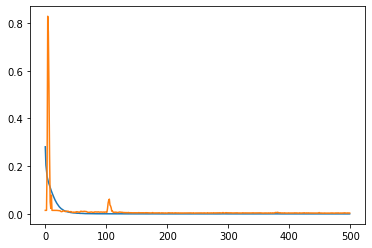

3/3 [==============================] - 1s 73ms/step - loss: 0.0038 - mae: 0.0474
loss= 0.003849793691188097
mape= 0.04736999794840813


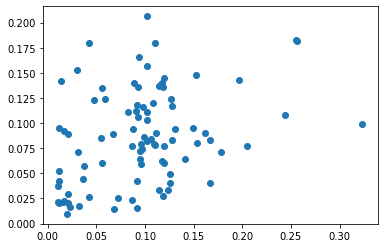

In [29]:
# template_image_data_vannilla_cnn_regression 참고

import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

model = keras.Sequential()
model.add(Input((64, 64, 3)))   # CHANGE <-----------------
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))   # CHANGE <-----------------

model.summary()

model.compile(optimizer='Adam', loss='mse', metrics=["mae"])

# history = model.fit(train_x, train_y, epochs=100, batch_size=64, validation_split=0.1, verbose=1)
history = model.fit(train_x, train_y, epochs=500, batch_size=64, validation_split=0.1, verbose=1)# CHANGE <-----------------


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


y_ = model.predict(test_x)  # CHANGE <-----------------
plt.scatter(test_y, y_)  # CHANGE <-----------------
plt.show()  # CHANGE <-----------------


# for i in range(16):    # OUT <-----------------
#   plt.imshow(test_x[i])
#   plt.scatter(predicted[i][0], predicted[i][1], color='yellow')
#   plt.show()


In [30]:
# import the necessary packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate

## 개별 모델로 학습 실행

위에서 실행했음

### 속성 모델

In [31]:
input = Input(trainAttrX[0].shape)
x = Dense(10, activation='relu')(input)
x = Dense(10, activation='relu')(x)
output = Dense(1)(x)

attr_model = Model(input, output)

In [32]:
attr_model.compile(optimizer="adam", loss="mse")
attr_model.summary()

attr_model.fit(trainAttrX, trainY, epochs=100, verbose=0, batch_size=128)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [33]:
preds = attr_model.predict(testAttrX)

diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print("[INFO] mean: {:.2f}%, std: {:.2f}".format(mean, std))

[INFO] mean: 50.20%, std: 94.83


### 영상 모델

In [34]:
input = Input(trainImagesX[0].shape)
x = Conv2D(32, (3,3))(input)
x = MaxPooling2D((2,2))(x)
x = Conv2D(32, (3,3))(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(10, activation='relu')(x)
x = Dense(10, activation='relu')(x)
output = Dense(1)(x)

image_model = Model(input, output)

In [35]:
image_model.compile(optimizer="adam", loss="mse")
image_model.summary()

image_model.fit(trainImagesX, trainY, epochs=100, verbose=0, batch_size=128)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0   

In [36]:
preds = image_model.predict(testImagesX)

diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print("[INFO] mean: {:.2f}%, std: {:.2f}".format(mean, std))

[INFO] mean: 122.67%, std: 228.23


여기까지 해봤음.

## 다중 입력 모델로 학습 실행

In [37]:
attr_input = Input(trainAttrX[0].shape)
x = Dense(10, activation='relu')(attr_input)
attr_out = Dense(10, activation='linear')(x)

image_input = Input(trainImagesX[0].shape)
x = Conv2D(32, (3,3))(image_input)
x = MaxPooling2D((2,2))(x)
x = Conv2D(32, (3,3))(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(10, activation='relu')(x)
image_output = Dense(10, activation='linear')(x)

combined_input = concatenate([attr_out, image_output])

x = Dense(4, activation="relu")(combined_input)
output = Dense(1)(x)


combined_model = Model([attr_input, image_input], output)

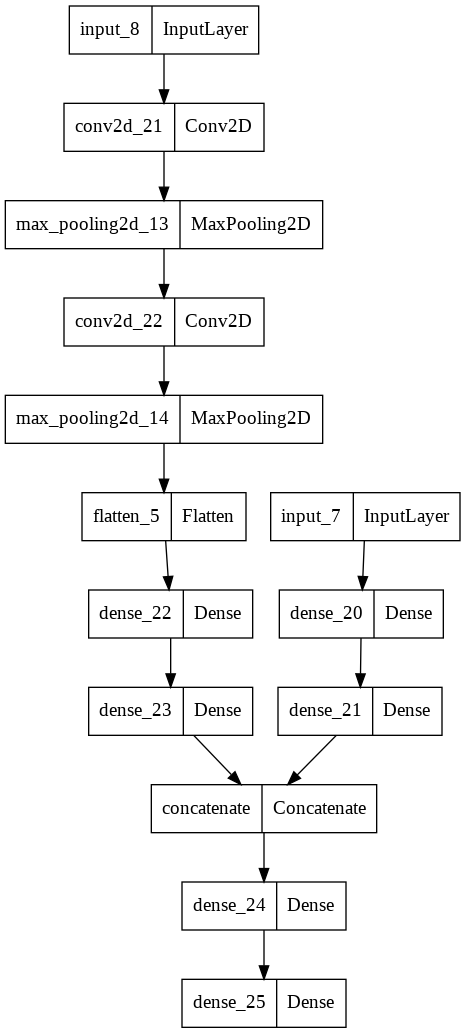

In [38]:
import tensorflow
tensorflow.keras.utils.plot_model(combined_model)

In [39]:
combined_model.compile(optimizer="adam", loss="mse", metrics=["mape"]) # ADD : metrics
combined_model.summary()

combined_model.fit([trainAttrX, trainImagesX], trainY, epochs=500, verbose=1, batch_size=128)  # CHAGE : verbose 0 -> 1

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_21 (Conv2D)             (None, 62, 62, 32)   896         ['input_8[0][0]']                
                                                                                                  
 max_pooling2d_13 (MaxPooling2D  (None, 31, 31, 32)  0           ['conv2d_21[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_22 (Conv2D)             (None, 29, 29, 32)   9248        ['max_pooling2d_13[0][0]'] 

In [40]:
loss, mape = combined_model.evaluate((testAttrX, testImagesX), testY)
print("loss=", loss)
print("mape=", mape)

3/3 [==============================] - 0s 5ms/step - loss: 0.0036 - mape: 119.2127
loss= 0.0035799273755401373
mape= 119.21270751953125


In [41]:
preds = combined_model.predict([testAttrX, testImagesX])

diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print("[INFO] mean: {:.2f}%, std: {:.2f}".format(mean, std))

[INFO] mean: 119.21%, std: 199.19


# 다중 출력

copy from https://www.pyimagesearch.com/2018/06/04/keras-multiple-outputs-and-multiple-losses/

## 데이터 준비

In [42]:
!wget https://github.com/dhrim/MDC_2021/raw/master/material/deep_learning/fashion_dataset.zip

--2022-01-26 00:39:05--  https://github.com/dhrim/MDC_2021/raw/master/material/deep_learning/fashion_dataset.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/fashion_dataset.zip [following]
--2022-01-26 00:39:05--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/fashion_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26991216 (26M) [application/zip]
Saving to: ‘fashion_dataset.zip’

fashion_dataset.zip 100%[===================>]  25.74M  --.-KB/s    in 0.1s    

2022-01-26 00:39:06 (255 MB/s) - ‘fashio

In [43]:
!ls -alh

total 26M
drwxr-xr-x 1 root root 4.0K Jan 26 00:39 .
drwxr-xr-x 1 root root 4.0K Jan 26 00:31 ..
drwxr-xr-x 4 root root 4.0K Jan  7 14:33 .config
-rw-r--r-- 1 root root  26M Jan 26 00:39 fashion_dataset.zip
drwxr-xr-x 4 root root 4.0K Jan 26 00:35 Houses-dataset
-rw-r--r-- 1 root root  34K Jan 26 00:38 model.png
drwxr-xr-x 1 root root 4.0K Jan  7 14:33 sample_data


In [44]:
!unzip fashion_dataset.zip

Archive:  fashion_dataset.zip
   creating: fashion_dataset/
   creating: fashion_dataset/black_jeans/
  inflating: fashion_dataset/black_jeans/00000000.jpg  
   creating: __MACOSX/
   creating: __MACOSX/fashion_dataset/
   creating: __MACOSX/fashion_dataset/black_jeans/
  inflating: __MACOSX/fashion_dataset/black_jeans/._00000000.jpg  
  inflating: fashion_dataset/black_jeans/00000004.jpg  
  inflating: __MACOSX/fashion_dataset/black_jeans/._00000004.jpg  
  inflating: fashion_dataset/black_jeans/00000006.jpg  
  inflating: __MACOSX/fashion_dataset/black_jeans/._00000006.jpg  
  inflating: fashion_dataset/black_jeans/00000007.jpg  
  inflating: __MACOSX/fashion_dataset/black_jeans/._00000007.jpg  
  inflating: fashion_dataset/black_jeans/00000009.jpg  
  inflating: __MACOSX/fashion_dataset/black_jeans/._00000009.jpg  
  inflating: fashion_dataset/black_jeans/00000010.jpg  
  inflating: __MACOSX/fashion_dataset/black_jeans/._00000010.jpg  
  inflating: fashion_dataset/black_jeans/000000

```
fashion_dataset/
  black_jeans
  black_shoes/
  blue_dress/
  blue_jeans
  blue_shirt/
  red_dress/
  red_shirt/
```

```
category : jeans, shoes, dress, shirt
color : black, blue, red
```

In [54]:
import matplotlib

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [55]:
IMAGE_DIMS = (96, 96, 3)

### 영상 파일이름 읽기

In [56]:
imagePaths = sorted(list(paths.list_images('fashion_dataset')))
random.shuffle(imagePaths)
print(len(imagePaths))
print(imagePaths[:3])

755
['fashion_dataset/red_shirt/00000067.jpg', 'fashion_dataset/blue_dress/00000046.jpg', 'fashion_dataset/black_jeans/00000010.jpg']


### 영상 읽기, 카테고리와 컬러 읽기

In [57]:
data = []
categoryLabels = []
colorLabels = []

for imagePath in imagePaths:
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = img_to_array(image)
	data.append(image)

	(color, cat) = imagePath.split(os.path.sep)[-2].split("_")
  # imagePath = 'fashion_dataset/black_shoes/00000048.jpg'
  # color = 'black'
  # cat = 'shoes'
	categoryLabels.append(cat)
	colorLabels.append(color)

In [58]:
print(categoryLabels[:10])
print(colorLabels[:10])

['shirt', 'dress', 'jeans', 'shirt', 'jeans', 'shirt', 'shirt', 'jeans', 'shirt', 'shirt']
['red', 'blue', 'black', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'red']


755 755 755
iamgePaths[0]= fashion_dataset/red_shirt/00000067.jpg


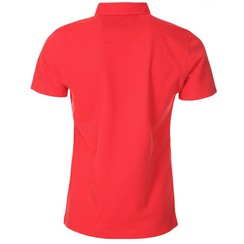

data[0]= (96, 96, 3)
categoryLabels[0]= shirt
colorLabels[0]= red


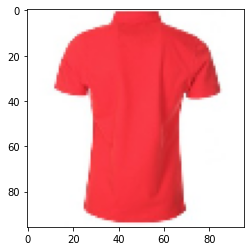

In [59]:
from IPython.display import Image, display

print(len(data), len(categoryLabels), len(colorLabels))
print("iamgePaths[0]=", imagePaths[0])
display(Image(imagePaths[0]))

print("data[0]=", data[0].shape)
plt.imshow(data[0]/255)
print("categoryLabels[0]=", categoryLabels[0])
print("colorLabels[0]=", colorLabels[0])

### numpy로 변환

In [60]:
data = np.array(data, dtype="float")
print("[INFO] data matrix: {} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))

# convert the label lists to NumPy arrays prior to binarization
categoryLabels = np.array(categoryLabels)
colorLabels = np.array(colorLabels)

[INFO] data matrix: 755 images (163.08MB)


## normalization

In [61]:
data = data/255.

### 레이블 데이터를 one-hot 인코딩

In [62]:
print(categoryLabels[:5])
categoryLB = LabelBinarizer()
categoryLabels = categoryLB.fit_transform(categoryLabels)
print(categoryLabels[:5])


print(colorLabels[:5])
colorLB = LabelBinarizer()
colorLabels = colorLB.fit_transform(colorLabels)
print(colorLabels[:5])

['shirt' 'dress' 'jeans' 'shirt' 'jeans']
[[0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]]
['red' 'blue' 'black' 'blue' 'blue']
[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]]


### 데이터 분리

In [63]:
(trainX, testX, trainCategoryY, testCategoryY, trainColorY, testColorY) = train_test_split(data, categoryLabels, colorLabels, test_size=0.2, random_state=42)

print(trainX.shape)
print(trainCategoryY.shape)
print(trainColorY.shape)

print(testX.shape)
print(testCategoryY.shape)
print(testColorY.shape)

(604, 96, 96, 3)
(604, 4)
(604, 3)
(151, 96, 96, 3)
(151, 4)
(151, 3)


In [64]:
CATEGORY_COUNT = categoryLabels.shape[-1]
COLOR_COUNT = colorLabels.shape[-1]

print(CATEGORY_COUNT)
print(COLOR_COUNT)

4
3


## 개별 모델로 학습 실행

In [65]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input


def build_category_model():

  model = keras.Sequential()
  model.add(Input(IMAGE_DIMS))
  model.add(Conv2D(32, (3, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(CATEGORY_COUNT, activation='softmax'))

  return model

def build_color_model():

  model = keras.Sequential()
  model.add(Input(IMAGE_DIMS))
  model.add(Conv2D(32, (3, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(COLOR_COUNT, activation='softmax'))

  return model  

In [66]:
print(trainX.shape)
print(trainCategoryY.shape)
print(CATEGORY_COUNT)

(604, 96, 96, 3)
(604, 4)
4


### 카테고리 모델

In [67]:
category_model = build_category_model()

category_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
category_model.summary()


category_model.fit(trainX, trainCategoryY, epochs=5, verbose=1, batch_size=128)


loss, acc = category_model.evaluate(testX, testCategoryY)
print("loss=",loss)
print("acc=",acc)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 30976)             0         
                                                                 
 dense_26 (Dense)            (None, 10)               

### 컬러 모델

In [68]:
print(trainX.shape)
print(trainColorY.shape)
print(COLOR_COUNT)

(604, 96, 96, 3)
(604, 3)
3


In [69]:
color_model = build_color_model()

color_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
color_model.summary()


color_model.fit(trainX, trainColorY, epochs=5, verbose=1, batch_size=128)


loss, acc = color_model.evaluate(testX, testColorY)
print("loss=",loss)
print("acc=",acc)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 30976)             0         
                                                                 
 dense_29 (Dense)            (None, 10)               

## 다중 출력 모델로 학습 실행

In [70]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input


def common_input_branch(input):

  x = Conv2D(32, (3, 3))(input)
  x = MaxPooling2D((2, 2))(x)
  x = Conv2D(64, (3, 3))(x)
  x = MaxPooling2D((2, 2))(x)
  x = Flatten()(x)

  return x


def category_branch(x):

  x = Dense(10, activation='relu')(x)
  x = Dense(10, activation='relu')(x)
  x = Dense(CATEGORY_COUNT, activation='softmax', name='category_output')(x)

  return x

def color_branch(x):

  x = Dense(10, activation='relu')(x)
  x = Dense(10, activation='relu')(x)
  x = Dense(COLOR_COUNT, activation='softmax', name='color_output')(x)

  return x

In [71]:
input = Input(IMAGE_DIMS)

common_input = common_input_branch(input)
category_output = category_branch(common_input)
color_output = color_branch(common_input)

multi_output_model = Model(input, [category_output, color_output])

multi_output_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d_27 (Conv2D)             (None, 94, 94, 32)   896         ['input_11[0][0]']               
                                                                                                  
 max_pooling2d_19 (MaxPooling2D  (None, 47, 47, 32)  0           ['conv2d_27[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_28 (Conv2D)             (None, 45, 45, 64)   18496       ['max_pooling2d_19[0][0]'] 

In [72]:
losses = { "category_output":"categorical_crossentropy", "color_output":"categorical_crossentropy"}
loss_weights = { "category_output":1.0, "color_output":1.0}

# color_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
multi_output_model.compile(optimizer="adam", loss=losses, loss_weights=loss_weights, metrics=["accuracy"])


# color_model.fit(trainX, trainColorY, epochs=5, verbose=1, batch_size=128)
multi_output_model.fit(trainX, {"category_output":trainCategoryY, "color_output":trainColorY}, epochs=50, verbose=1, batch_size=128)

Epoch 1/50
5/5 [==============================] - 1s 20ms/step - loss: 2.8270 - category_output_loss: 1.5952 - color_output_loss: 1.2318 - category_output_accuracy: 0.3262 - color_output_accuracy: 0.4719
Epoch 2/50
5/5 [==============================] - 0s 20ms/step - loss: 2.2824 - category_output_loss: 1.3621 - color_output_loss: 0.9203 - category_output_accuracy: 0.3775 - color_output_accuracy: 0.6291
Epoch 3/50
5/5 [==============================] - 0s 21ms/step - loss: 1.7649 - category_output_loss: 1.1290 - color_output_loss: 0.6359 - category_output_accuracy: 0.5480 - color_output_accuracy: 0.6970
Epoch 4/50
5/5 [==============================] - 0s 21ms/step - loss: 1.5295 - category_output_loss: 1.0037 - color_output_loss: 0.5258 - category_output_accuracy: 0.6424 - color_output_accuracy: 0.7781
Epoch 5/50
5/5 [==============================] - 0s 21ms/step - loss: 1.2614 - category_output_loss: 0.8862 - color_output_loss: 0.3751 - category_output_accuracy: 0.6093 - color_outp

In [73]:
loss, category_loss, color_loss, category_acc, color_acc = multi_output_model.evaluate(testX, {"category_output":testCategoryY, "color_output":testColorY})
print("loss=",loss)
print("categoyr_loss=", category_loss)
print("color_loss=", color_loss)
print("category_acc=", category_acc)
print("color_acc=", color_acc)

5/5 [==============================] - 0s 6ms/step - loss: 0.2234 - category_output_loss: 0.1636 - color_output_loss: 0.0599 - category_output_accuracy: 0.9536 - color_output_accuracy: 0.9934
loss= 0.22343894839286804
categoyr_loss= 0.16358746588230133
color_loss= 0.059851475059986115
category_acc= 0.9536423683166504
color_acc= 0.9933775067329407
